In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tushare as ts
import copy
import os
import warnings; warnings.simplefilter('ignore') #忽略可能会出现的警告信息，警告并不是错误，可以忽略；
from tqdm import tqdm

In [2]:
ts.set_token('409d075a0cb1808e1a0ef0d015b77e580dbbce978cea08c577df4308')#设置token，只需设置一次
api = ts.pro_api()

In [3]:
vol_20 = pd.read_csv('DAVOL20.csv')

In [4]:
vol_20.columns

Index(['date', '000001.SZ', '000002.SZ', '000004.SZ', '000005.SZ', '000006.SZ',
       '000007.SZ', '000008.SZ', '000009.SZ', '000010.SZ',
       ...
       '603987.SH', '603988.SH', '603989.SH', '603990.SH', '603991.SH',
       '603993.SH', '603996.SH', '603997.SH', '603998.SH', '603999.SH'],
      dtype='object', length=3570)

In [5]:
pro = ts.pro_api()
def get_zz500(start,end):
    return ts.pro_bar(ts_code='000985.SH',asset='I',\
               adj='qfq', start_date=start, end_date=end)['pct_chg'].tolist()    

In [13]:
def get_head_6_fac(year):
    fac = {}
    for f in tqdm(os.listdir(r'C:\Users\thinkpad\Desktop\因子库\factor')[1:-1]):
        if f == 'data':
            continue
        b = pd.read_csv(f)
        d = b[(str(year)<=b.date) & (b.date<str(year+1))]
        start = d['date'].apply(lambda x:x[:4]+x[5:7]+x[8:10]).values[0]
        end = d['date'].apply(lambda x:x[:4]+x[5:7]+x[8:10]).values[-1]
#         print(start,end)
        a = d.set_index('date').stack().reset_index(0).groupby('date').mean()
        a['zz500'] = get_zz500(start,end)[:len(a)]
        fac[f[:-4]] = (a.iloc[:,0]).corr(a.iloc[:,-1])
    fac_ic = pd.DataFrame(fac,index=['IC'])   
    return abs(fac_ic).T.sort_values(by='IC',ascending=False).head(6).index.tolist()
  

In [7]:
# fac_lis = list(map(get_head_6_fac,range(2008,2019)))

In [14]:
fac_dic = {}
for i in range(2008,2019):
    fac_dic[i] = get_head_6_fac(i)

100%|██████████| 16/16 [00:32<00:00,  2.02s/it]


In [15]:
fac_dic

{2008: ['GainVariance120',
  'GainVariance20',
  'DAREV',
  'DAVOL20',
  'GainLossVarianceRatio60',
  'GainLossVarianceRatio120'],
 2009: ['DAREV', 'EMA26', 'AD', 'ATR14', 'GREV', 'GainVariance120'],
 2010: ['GREV',
  'AD',
  'GainLossVarianceRatio60',
  'GainLossVarianceRatio20',
  'GainLossVarianceRatio120',
  'GainVariance120'],
 2011: ['GainLossVarianceRatio60',
  'GainLossVarianceRatio120',
  'DAVOL20',
  'GainLossVarianceRatio20',
  'ATR14',
  'InformationRatio60'],
 2012: ['ILLIQUIDITY',
  'EMA26',
  'FinancialExpenseRate',
  'AD',
  'DAVOL20',
  'GREV'],
 2013: ['DAVOL20',
  'FinancialExpenseRate',
  'ATR14',
  'ILLIQUIDITY',
  'GREV',
  'EMA26'],
 2014: ['EMA26',
  'GainLossVarianceRatio120',
  'GainLossVarianceRatio60',
  'DAVOL20',
  'GainLossVarianceRatio20',
  'AD'],
 2015: ['GainVariance20',
  'GainLossVarianceRatio20',
  'GainLossVarianceRatio120',
  'GainLossVarianceRatio60',
  'ILLIQUIDITY',
  'ATR14'],
 2016: ['AD', 'EMA26', 'ILLIQUIDITY', 'GainVariance120', 'GREV', '

In [16]:
def get_hs300(start,end):
    return ts.pro_bar(ts_code='000300.SH',asset='I',\
               adj='qfq', start_date=start, end_date=end)['pct_chg'].tolist() 

In [17]:
hangqing = pd.read_pickle('data/full_data.pkl')

In [18]:
hangqing.reset_index()

,index,OPEN,HIGH,LOW,CLOSE,TURN,s
0,2005-01-04,7.957941,7.978139,7.856952,7.877150,0.084750,600546.SH
1,2005-01-05,7.877150,8.079128,7.675172,7.685271,3.108740,600546.SH
2,2005-01-06,7.675172,7.715567,7.321710,7.372204,1.654045,600546.SH
3,2005-01-07,7.352006,7.513589,7.341908,7.412600,1.563505,600546.SH
4,2005-01-10,7.422699,7.473193,7.352006,7.442897,0.513000,600546.SH
...,...,...,...,...,...,...,...
12509013,2020-11-18,40.121746,40.334782,39.624663,40.192758,1.323015,600405.SH
12509014,2020-11-19,39.908710,40.618830,39.908710,40.263770,1.365033,600405.SH
12509015,2020-11-20,40.263770,42.181092,39.979722,41.399961,5.013187,600405.SH
12509016,2020-11-23,41.328949,41.897045,40.973889,41.399961,3.427870,600405.SH


In [19]:
hangqing['month'] = hangqing.reset_index()['index'].apply(str).apply(lambda x:x[:7]).tolist()

In [20]:
hangqing

,OPEN,HIGH,LOW,CLOSE,TURN,s,month
2005-01-04,7.957941,7.978139,7.856952,7.877150,0.084750,600546.SH,2005-01
2005-01-05,7.877150,8.079128,7.675172,7.685271,3.108740,600546.SH,2005-01
2005-01-06,7.675172,7.715567,7.321710,7.372204,1.654045,600546.SH,2005-01
2005-01-07,7.352006,7.513589,7.341908,7.412600,1.563505,600546.SH,2005-01
2005-01-10,7.422699,7.473193,7.352006,7.442897,0.513000,600546.SH,2005-01
...,...,...,...,...,...,...,...
2020-11-18,40.121746,40.334782,39.624663,40.192758,1.323015,600405.SH,2020-11
2020-11-19,39.908710,40.618830,39.908710,40.263770,1.365033,600405.SH,2020-11
2020-11-20,40.263770,42.181092,39.979722,41.399961,5.013187,600405.SH,2020-11
2020-11-23,41.328949,41.897045,40.973889,41.399961,3.427870,600405.SH,2020-11


In [21]:
hangqing = hangqing[(hangqing.month>'2008-12')&(hangqing.month<'2019')]

hq = pd.DataFrame()
for s,d in tqdm(hangqing.groupby('s')):
    d['ret'] = np.log(d['CLOSE']/d['CLOSE'].shift())
    hq = pd.concat([hq,d],axis=0)

In [25]:
def get_top_30(year):

    df =pd.DataFrame()
    for f in fac_dic[year-1]:
        b = pd.read_csv(f+'.csv')
        d = b[(str(year-1)<=b.date) & (b.date<str(year))]
        f = d.set_index('date').stack().reset_index()
        if len(df)==0:
            df = f.copy()
        else:
            df = pd.merge(df,f,on=['date','level_1'])
    df['score'] = df.iloc[:,-6:].sum(1)
    df['month'] = df.date.apply(lambda x:x[:7])
    return df

In [26]:
from tqdm import trange
data = pd.DataFrame()
for i in trange(2009,2019):
    data = pd.concat([data,get_top_30(i)],axis=0)

100%|██████████| 10/10 [02:17<00:00, 13.79s/it]


In [27]:
data['month'] = data.date.apply(lambda x:x[:7])

In [35]:
data = data.sort_values(by=['date','score'],ascending=[True,False])

In [51]:
get_6 = pd.DataFrame()
for m,df in data.groupby('month'):
    dd = df.head(6)
    get_6 = pd.concat([get_6,dd],axis=0)
    

In [52]:
get_6 = get_6.reset_index()

In [53]:
stocks = get_6.level_1.unique().tolist()

In [54]:
len(get_6)

720

In [55]:
len(stocks)

160

In [56]:
hq1 = pd.DataFrame()
for s in tqdm(stocks):
    d = hangqing[hangqing.s == s]
    d['ret'] = np.log(d['CLOSE']/d['CLOSE'].shift())
    hq1 = pd.concat([hq1,d],axis=0)

100%|██████████| 160/160 [01:44<00:00,  1.53it/s]


In [57]:
hq1

,OPEN,HIGH,LOW,CLOSE,TURN,s,month,ret
2009-01-05,16.845385,17.306353,16.234101,16.935574,5.790481,002167.SZ,2009-01,NaN
2009-01-06,16.935574,17.085890,16.244122,16.955617,5.174107,002167.SZ,2009-01,0.001183
2009-01-07,17.045806,17.085890,16.604880,16.745175,3.163801,002167.SZ,2009-01,-0.012489
2009-01-08,16.574817,16.685048,15.933470,16.173975,3.680441,002167.SZ,2009-01,-0.034707
2009-01-09,16.173975,17.787364,16.173975,17.787364,7.933542,002167.SZ,2009-01,0.095085
...,...,...,...,...,...,...,...,...
2018-12-24,12.525744,12.670272,12.525744,12.622096,0.518844,000725.SZ,2018-12,0.007663
2018-12-25,12.477568,12.525744,12.140337,12.429393,0.972622,000725.SZ,2018-12,-0.015385
2018-12-26,12.381217,12.766624,12.333041,12.670272,0.960251,000725.SZ,2018-12,0.019194
2018-12-27,12.862976,12.959328,12.622096,12.670272,0.972108,000725.SZ,2018-12,0.000000


In [58]:
hqs = hq1.dropna().groupby(['month','s'])['ret'].mean()

In [59]:
hqs = hqs.reset_index()

In [60]:
hqs

,month,s,ret
0,2009-01,000049.SZ,0.014969
1,2009-01,000100.SZ,0.001789
2,2009-01,000423.SZ,0.004752
3,2009-01,000538.SZ,-0.003563
4,2009-01,000587.SZ,0.011115
...,...,...,...
14463,2018-12,603616.SH,0.001628
14464,2018-12,603678.SH,-0.002895
14465,2018-12,603828.SH,-0.003062
14466,2018-12,603889.SH,-0.001026


In [61]:
data = get_6.rename(columns={'level_1':'s'})

In [62]:
dfs = pd.merge(data,hqs,on=['month','s'],how='left')

In [64]:
dfs = dfs.dropna()

In [68]:
dfs = dfs.set_index('date')

In [71]:
dfs

,index,s,0_x,0_y,0_x,0_y,0_x,0_y,score,month,ret
date,,,,,,,,,,,
2009-01-05,473,600050.SH,0.4021,4.8651,7228.9092,0.2127,22.0000,0.1712,7256.5603,2009-01,-0.001697
2009-01-05,902,601398.SH,-0.1688,2.3804,6118.2282,0.1431,-58.0000,0.0987,6062.6816,2009-01,0.001181
2009-01-05,463,600028.SH,-0.0624,4.0246,5535.4501,0.1458,24.0000,0.1671,5563.7252,2009-01,0.007087
2009-01-05,450,600010.SH,-0.5263,0.9735,4997.8681,0.0419,-60.0000,0.1229,4938.4801,2009-01,0.002852
2009-01-05,919,601988.SH,-0.2090,1.9658,3881.8729,0.1196,10.0000,0.0962,3893.8455,2009-01,0.001177
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,658792,600795.SH,0.0687,33573.6769,0.1046,2.0482,1.6690,1.0305,33578.5979,2017-12,-0.004232
2017-12-01,659032,601899.SH,0.1017,33375.0860,0.0216,2.1198,2.0657,0.5827,33379.9775,2017-12,0.007151
2017-12-01,658189,600028.SH,0.1125,31884.2933,0.0013,1.4814,1.3900,1.5726,31888.8511,2017-12,0.000783


<AxesSubplot:xlabel='date'>

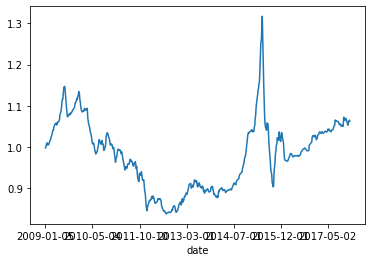

In [69]:
(dfs['ret']+1).cumprod().plot()

In [72]:
bench = pd.read_csv('data/hs300_ret.csv')

In [75]:
bench = bench.drop('Unnamed: 0',axis=1)

In [77]:
dfs = dfs.reset_index()

In [95]:
bench

,date,pct_chg,TRADE_DATE,total_buy,r1,r2,buy,ret,stg,benchmark
0,2009-01-21,-0.001718,2009-01-21,0.0,0.0,0.0,0.1,-0.003125,1.000000,1.000000
1,2009-02-17,-0.031253,2009-02-17,0.0,0.0,0.0,0.1,-0.004588,0.995412,0.993308
2,2009-02-18,-0.045885,2009-02-18,0.0,0.0,0.0,0.1,-0.004507,0.990925,0.997137
3,2009-02-24,-0.045067,2009-02-24,0.0,0.0,0.0,0.1,0.000104,0.991029,1.002201
4,2009-02-25,0.001044,2009-02-25,0.0,0.0,0.0,0.1,-0.003706,0.987356,1.009149
...,...,...,...,...,...,...,...,...,...,...
310,2018-10-29,-0.030484,2018-10-29,2.0,0.0,0.0,-1.0,-0.010846,3.352572,1.276279
311,2018-10-30,0.010846,2018-10-30,2.0,0.0,0.0,-1.0,0.008331,3.380503,1.272852
312,2018-11-05,-0.008331,2018-11-05,2.0,0.0,0.0,-1.0,0.006033,3.400897,1.276514
313,2018-11-06,-0.006033,2018-11-06,2.0,0.0,0.0,-1.0,-0.015481,3.348248,1.272580


In [85]:
stock_stg = dfs.groupby('date')['ret'].mean()

In [87]:
stock_stg = pd.DataFrame(stock_stg )

In [91]:
stock_stg  = stock_stg.reset_index()

In [96]:
stock_stgs = pd.merge(stock_stg,bench,on='date')

In [99]:
stock_stgs['stgs'] = stock_stgs['stg'] + stock_stgs['ret_x']

In [101]:
stock_stgs

,date,ret_x,pct_chg,TRADE_DATE,total_buy,r1,r2,buy,ret_y,stg,benchmark,stgs
0,2009-09-01,0.000972,0.004745,2009-09-01,0.0,0.000000,0.000000,0.1,0.001661,0.985975,1.069433,0.986947
1,2009-11-02,0.003000,0.034274,2009-11-02,0.0,0.000000,0.000000,0.1,-0.003204,0.981250,1.056805,0.984249
2,2013-05-02,0.003312,0.000953,2013-05-02,2.0,0.000000,0.000000,-1.0,-0.000908,1.126061,1.064527,1.129373
3,2013-07-01,-0.000086,0.005761,2013-07-01,2.0,0.000000,0.000000,-1.0,-0.003916,1.111534,1.070934,1.111448
4,2013-09-02,-0.002019,0.002781,2013-09-02,2.0,0.000000,0.000000,-1.0,-0.003230,1.161676,1.107568,1.159656
5,2013-10-08,-0.000220,0.013605,2013-10-08,2.0,0.000000,0.000000,-1.0,0.018701,1.207864,1.104523,1.207644
6,2013-11-01,0.002067,0.004736,2013-11-01,2.0,0.000000,0.000000,-1.0,0.008264,1.225903,1.085229,1.227970
7,2013-12-02,-0.002835,-0.008264,2013-12-02,2.0,0.000000,0.000000,-1.0,-0.009921,1.213741,1.072730,1.210906
8,2014-04-01,-0.000939,0.007832,2014-04-01,2.0,0.000000,0.000000,-1.0,-0.008142,1.297972,1.168403,1.297034
9,2015-02-02,-0.000146,-0.023419,2015-02-02,0.0,0.000000,0.000000,0.1,-0.001619,1.466013,1.182626,1.465867


In [108]:
stock_stgs['stgs'] = stock_stgs['stgs']/stock_stgs['stgs'].values[0]
stock_stgs['benchmark'] = stock_stgs['benchmark']/stock_stgs['benchmark'].values[0]

<AxesSubplot:xlabel='date'>

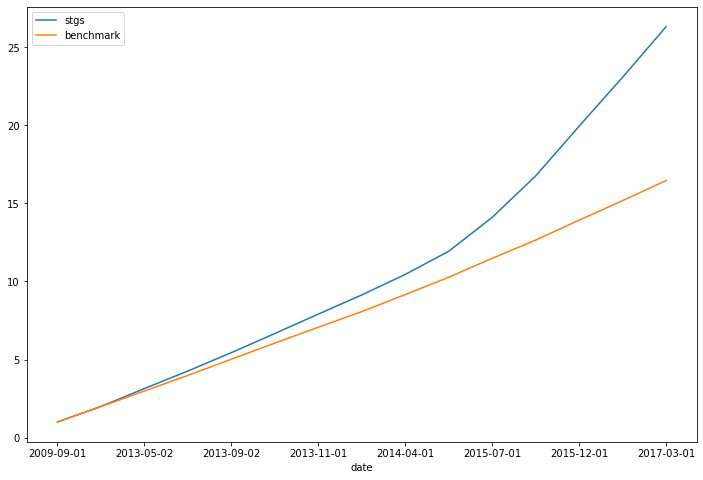

In [110]:
(stock_stgs.set_index('date')[['stgs','benchmark']]).cumsum().plot(figsize=(12,8))

In [102]:
datas = stock_stgs[['stgs','benchmark']]

In [103]:
# 定义函数求各项回测指标
def ratio(datas):
    res = []
    for item in datas:
        data = datas[item]
        
        # 累积收益率        
        strategy_cum = (data + 1).cumprod()
        # 年化收益率
        return_year = data.mean() * 252
        # 每日收益率      
        return_avg = data.mean() 
        # 年化波动率
        volatility = data.std() * 252 ** 0.5
        # 最大每日收益
        profit_max = data.max()
        # 最大每日损失
        loss_max = data.min()
        # 信息比率               
        ir = return_year / volatility
        # 上涨天数
        num_of_up = data[data > 0].count()
        # 下跌天数
        num_of_down = data[data < 0].count()
        # 胜率
        win_rate = float(num_of_up) / (num_of_up + num_of_down)
        # 上涨时平均每日收益率
        gain_of_up = data[data > 0].mean()
        # 下跌时平均每日收益率        
        loss_of_down = data[data < 0].mean()
        # 盈亏比
        profit_loss_ratio = -(gain_of_up / loss_of_down)
        # 最大回撤
        drawdown = ((strategy_cum.cummax() - strategy_cum)/strategy_cum.cummax()).max()
        
        # 创建一个临时的DataFrame
        tmp = pd.DataFrame([ir, float((strategy_cum).tail(1)), return_year, return_avg, volatility, profit_max, loss_max,  
                            num_of_up, num_of_down, win_rate, gain_of_up, loss_of_down, profit_loss_ratio, drawdown], 
                           columns=[data.name], 
                           index=['Information Ratio', 'Cumulative Return', 'Annualised Return', 'Average return', 'Annualised Volatility', 'Maximum Daily Profit', 
                                  'Maximum Daily Loss', 'Number of Up Periods', 'Number of Down Periods', 'Win Rate', 'Avg Gain in Up Periods', 
                                  'Avg Loss in Down Periods', 'Profit and Loss Ratio', 'Maximum Drawdown'])
        res.append(tmp)
    # 返回拼接好的DataFrame
    return pd.concat(res,axis=1,join='inner')

In [104]:
ratio(datas)

,stgs,benchmark
Information Ratio,3.221916e+01,156.293423
Cumulative Return,1.907485e+06,111997.361308
Annualised Return,4.363544e+02,295.787381
Average return,1.731565e+00,1.173759
Annualised Volatility,1.354332e+01,1.892513
Maximum Daily Profit,3.193716e+00,1.374702
Maximum Daily Loss,9.842495e-01,1.056805
Number of Up Periods,1.500000e+01,15.000000
Number of Down Periods,0.000000e+00,0.000000
Win Rate,1.000000e+00,1.000000


In [113]:
from sklearn import linear_model        #表示，可以调用sklearn中的linear_model模块进行线性回归。
import numpy as np
model = linear_model.LinearRegression()
model.fit(stock_stgs['benchmark'].values.reshape(-1, 1), stock_stgs['stgs'].values.reshape(-1, 1))
display(model.intercept_)  #截距
display(model.coef_)  #线性模型的系数

array([-6.42789108])

array([[7.45509033]])

In [117]:
model.coef_[0][0]

7.455090325799308